In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import test1 as t
import seaborn as sns
%matplotlib inline


In [20]:
df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
df.head(3)

Respondent            Professional ProgramHobby         Country  \
0           1                 Student    Yes, both   United States   
1           2                 Student    Yes, both  United Kingdom   
2           3  Professional developer    Yes, both  United Kingdom   

       University                        EmploymentStatus  \
0              No  Not employed, and not looking for work   
1  Yes, full-time                      Employed part-time   
2              No                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   

                             MajorUndergrad  \
0                                       NaN   
1  Computer science or software engineering   
2  Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   

                CompanySize  ... StackOverflowMakeMoney Gender  \
0                       NaN  ...      Strongly disagree   Male   
1        20 to 99 employees  ...      Strongly disagree   Male   
2  10,000 or more employees  ...               Disagree   Male   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  

[3 rows x 154 columns]

In [21]:
schema.head(3)

Column                                           Question
0    Respondent                               Respondent ID number
1  Professional         Which of the following best describes you?
2  ProgramHobby  Do you program as a hobby or contribute to ope...

In [22]:
schema[schema.Column=='CousinEducation']['Question'].values

array(["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer.

# 1 How To Break Into the Field

In [23]:
#The description of each of the 147 columns is given in the file "schema".
# So we create a function which will take input of any column name and get its description from the "schema"

In [24]:
## How To Break Into the Field
def get_description(schema, column_name):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT -
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

In [25]:
# for example we can find the description of 'CousinEducation' using the following function
get_description(schema, 'CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

### 1.1 Analysis of "CousinEducation" field

In [26]:
schema[schema.Column=='CousinEducation']['Question'].values

array(["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer.

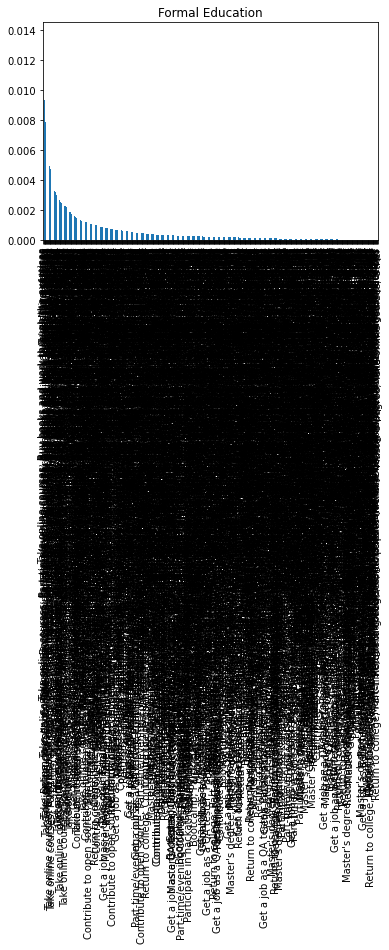

In [27]:
## Plotting 'CousinEducation' values
(df['CousinEducation'].value_counts()/df.shape[0]).plot(kind='bar')
plt.title('Formal Education')
plt.show()

#### Data Cleaning to check Relation of "CousinEducation" with job satisfaction

In [28]:
df['CousinEducation'].value_counts()[0:25]

Take online courses; Buy books and work through the exercises                                                                          711
Take online courses                                                                                                                    551
None of these                                                                                                                          523
Take online courses; Part-time/evening courses; Buy books and work through the exercises                                               479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises                                     465
Other                                                                                                                                  403
Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises                            384
Take online courses; Contri

In [29]:
# we can see the possible values are the following
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

In [30]:
# We shall make a function which will count the values of the different values
# first we convert the value_count() out put using reset_index
df['CousinEducation'].value_counts().reset_index()

index  CousinEducation
0    Take online courses; Buy books and work throug...              711
1                                  Take online courses              551
2                                        None of these              523
3    Take online courses; Part-time/evening courses...              479
4    Take online courses; Bootcamp; Part-time/eveni...              465
..                                                 ...              ...
730  Master's degree; Participate in hackathons; Bu...                1
731  Master's degree; Get a job as a QA tester; Boo...                1
732  Return to college; Participate in hackathons; ...                1
733  Return to college; Part-time/evening courses; ...                1
734        Master's degree; Take online courses; Other                1

[735 rows x 2 columns]

In [31]:
df1=df['CousinEducation'].value_counts().reset_index()

In [32]:
## then 
from collections import defaultdict
new_df = defaultdict(int)
for val in possible_vals:
        for idx in range(df1.shape[0]):
            if val in df1['index'][idx]:
                new_df[val] += int(df1['CousinEducation'][idx])
new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
new_df.columns = ['cousinEducation', 'count']
new_df.sort_values('count', ascending=False, inplace=True)
new_df.head(2)


cousinEducation  count
0                       Take online courses  15246
1  Buy books and work through the exercises  11750

In [33]:
new_df.index.values

array([ 0,  1,  3,  5,  7,  6,  4,  9,  8, 11, 10, 12,  2], dtype=int64)

In [34]:
new_df['cousinEducation'].values

array(['Take online courses', 'Buy books and work through the exercises',
       'Part-time/evening courses', 'Contribute to open source',
       'Bootcamp', 'Conferences/meet-ups', 'Return to college',
       'Participate in online coding competitions',
       'Get a job as a QA tester', 'Participate in hackathons',
       "Master's degree", 'Other', 'None of these'], dtype=object)

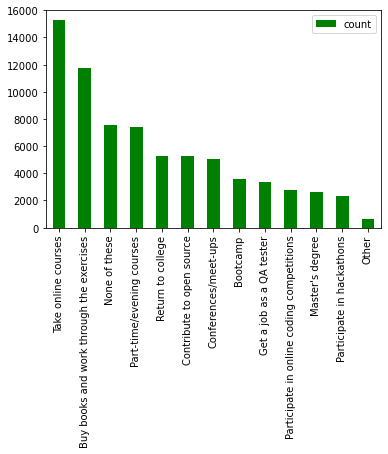

In [35]:
new_df['count'].plot(kind='bar', legend='index',color='green')
plt.xticks(new_df.index.values,new_df['cousinEducation'].values, rotation ='90')
plt.show()

In [58]:
## we can combine above operation in shape of 2 functions also
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    # https://www.accelebrate.com/blog/using-defaultdict-python
    
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values(col2, ascending=False, inplace=True)
    return new_df

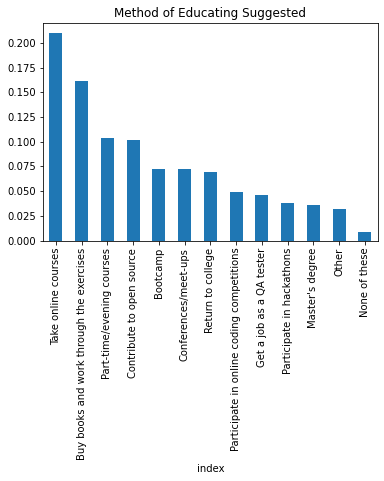

In [59]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index() #using reset index changes it to datafr
    #study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'index', 'CousinEducation', possible_vals)

    study_df.set_index('index', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
#     props_study_df = study_df/study_df.sum()
#     return props_study_df
    
clean_and_plot(df)

## Result of CousinEducation analysis
We see that most of the answers involved "Take online courses" while "Master's degree" is among the last 3

## 1.2 Analysis of Higher Education using the "FormalEducation" columns

In [38]:
df.FormalEducation.value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

In [39]:
## We shall make a function that checks for Professional ,Masters or Doctoral degrees assigning 1 to these values and vice versa

In [40]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Professional degree","Doctoral degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Professional degree","Doctoral degree"):
        return 1
    else:
        return 0
    

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    1
4    1
Name: FormalEducation, dtype: int64

In [60]:
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
higher_ed_perc

0.25614881693648817

**4.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

Notice, we have already created the **HigherEd** column 

In [61]:
ed_1 = df[df['HigherEd']==1]
# Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd']==0]
# Subset df to only those with HigherEd of 0


print(ed_1['HigherEd'][:5]) 
print(ed_0['HigherEd'][:5]) 

3    1
4    1
6    1
7    1
9    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
5    0
8    0
Name: HigherEd, dtype: int64


In [40]:
ed_1.shape,ed_0.shape

((13164, 155), (38228, 155))

In [63]:
## we can combine above operation in shape of 2 functions also
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    # https://www.accelebrate.com/blog/using-defaultdict-python
    
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values(col2, ascending=False, inplace=True)
    return new_df

In [66]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot_df(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index() #using reset index changes it to datafr
    
    study_df = total_count(study, 'index', 'CousinEducation', possible_vals)

    study_df.set_index('index', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    


In [67]:
ed_1_perc = clean_and_plot_df(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot_df(ed_0, 'Max of Bachelors Higher Ed', plot=False)

In [68]:
ed_1_perc.head(2)

CousinEducation
index                                                    
Take online courses                              0.206234
Buy books and work through the exercises         0.162959

In [69]:
## merging the two dataframes of Higher education and maximum Bac
comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)

In [70]:
comp_df.head(3)

CousinEducation_x  CousinEducation_y
index                                                                         
Take online courses                                0.206234           0.210548
Buy books and work through the exercises           0.162959           0.160867
Part-time/evening courses                          0.101736           0.103791

In [71]:
## renaming the columns
comp_df.columns = ['ed_1_perc', 'ed_0_perc']

In [72]:
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']

In [73]:
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

### Conclusion of Higher Education Analysis
1- Regardless of formal education, online courses are the top suggested form of education

2- Regardless of formal education, online courses are the top suggested form of education'

3-Those with higher formal education suggest it more than those who do not have it'


# 2 Boot Camp Analysis at Job Placement and Salary

In [ ]:
# will work on it later

# 3,4 Predicting Salary

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [75]:
df.describe()

Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
count  51392.000000        42695.000000     40376.000000  20600.000000   
mean   25696.500000            7.300574         6.957078      3.952282   
std    14835.736854            1.955444         2.167652      7.564722   
min        1.000000            0.000000         0.000000      0.000000   
25%    12848.750000            6.000000         6.000000      1.000000   
50%    25696.500000            8.000000         7.000000      1.000000   
75%    38544.250000            9.000000         8.000000      4.000000   
max    51392.000000           10.000000        10.000000     40.000000   

       StackOverflowSatisfaction         Salary  ExpectedSalary      HigherEd  
count               36592.000000   12891.000000     2566.000000  51392.000000  
mean                    8.429875   56298.480641    33142.220468      0.256149  
std                     1.390635   39880.905277    30162.988829      0.436509  
min                     0.000000       0.000000        0.000000      0.000000  
25%                     8.000000   26440.371839     4490.492484      0.000000  
50%                     9.000000   50000.000000    29364.263691      0.000000  
75%                    10.000000   80000.000000    50403.225806      1.000000  
max                    10.000000  197000.000000   187500.000000      1.000000

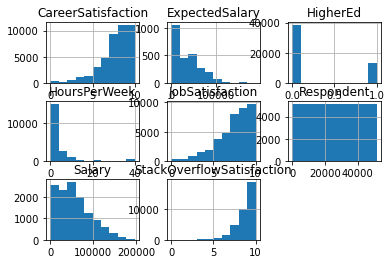

In [79]:
df.hist()

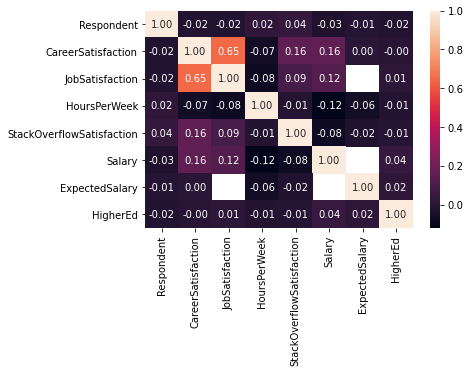

In [80]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [86]:
ix=df.corr().sort_values('HoursPerWeek', ascending=False).index
df_sorted = df.loc[:, ix]
df_sorted 

HoursPerWeek  Respondent  StackOverflowSatisfaction  HigherEd  \
0               0.0           1                        9.0         0   
1               NaN           2                        8.0         0   
2               NaN           3                        8.0         0   
3               5.0           4                       10.0         1   
4               NaN           5                        NaN         1   
...             ...         ...                        ...       ...   
51387           5.0       51388                        9.0         0   
51388           NaN       51389                        7.0         1   
51389           NaN       51390                        NaN         0   
51390           1.0       51391                        9.0         0   
51391           2.0       51392                        8.0         0   

       ExpectedSalary  CareerSatisfaction  JobSatisfaction    Salary  
0                 NaN                 NaN              NaN       NaN  
1             37500.0                 NaN              NaN       NaN  
2                 NaN                 8.0              9.0  113750.0  
3                 NaN                 6.0              3.0       NaN  
4                 NaN                 6.0              8.0       NaN  
...               ...                 ...              ...       ...  
51387             NaN                 7.0              3.0   58000.0  
51388             NaN                 NaN              NaN       NaN  
51389             NaN                10.0             10.0       NaN  
51390             NaN                 6.0              7.0   40000.0  
51391             NaN                 8.0              8.0       NaN  

[51392 rows x 8 columns]

### Correlation map results
#### 1- The column with strongest correlation with Salary is "CareerSatisfaction"

#### 2-The data suggests more hours worked Does not relates to higher salary

#### 3-The strongest negative relationship has correlation =-0.15

Note :Data in the 'CareerSatisfaction' column meant missing data in three other columns

### Removing or Imputing Missing values before making predictions 

The column with mixed heights, we should be able to (for the most part) map those to a consistent measurement (all meters or all feet). We don't want to just drop this.

If the response is missing, for those rows, we have nothing to predict. You might be interested in predicting those values. Without a target/response to predict, your model cannot learn. These rows are not providing information for training any sort of supervised learning model.

Though it is common to drop columns just because not many values exist, there may be value to grouping rows that have a column missing as compared to rows that do not have a missing value for that particular column.

If there is no variability (all the values are the same) in a column, it does not provide value for prediction or finding differences in your data. It should be dropped for this reason. Keeping it doesn't really hurt, but it can lead to confusing results as we will see later in this lesson.

When you have incorrect data, you do not want to input this information into your conclusions. You should attempt to correct these values, or you may need to drop them.

## Imputing Values (before running regression model to predict salary)

### Predicting salary using regression model just my dropping Missing values and then compare this model with the model which will use Imputation

In [89]:
#Subset to only quantitative vars
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]


In [91]:
# drop all the missing values in all rows
df_dropna = num_vars.dropna(axis=0)

In [92]:
#Split into explanatory and response variables
X = df_dropna[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df_dropna['Salary']

In [93]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

In [96]:
# checking the R2 score
from sklearn.metrics import r2_score
R2=r2_score( y_test, y_test_preds)
R2

0.030994664959115625

In [97]:

"The r-squared score for your model was {} on {} values.".format(R2, len(y_test))

'The r-squared score for your model was 0.030994664959115625 on 1602 values.'

In [102]:
np.sum(df.Salary.notnull())

12891

In [101]:
len(y_train) + len(y_test_preds)

5338

## Predicting salay by using Imputation instead of dropping all the Null values as before
### Previously we dropped all the NA values in all the num_vars dataframe rows (num_vars.dropna(axis=0))
### Now 
1-only drop NA values from the Target 'Salary' (num_vars.dropna(subset=['Salary'], axis=0)) and then 

2- Drop all column which has all NAN entries  

3-Finally impute all the ramaining columns with their mean values .
#### **Remember last time we dropped all the NA values from all the columns, this time we dropped NA values only from the Target column 'Salary', and the rest of the NA values in the columns are imputed by their mean values**

In [106]:
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0) #Drop the rows with missing salaries

# test look
drop_sal_df.head()

Salary  CareerSatisfaction  HoursPerWeek  JobSatisfaction  \
2   113750.0                 8.0           NaN              9.0   
14  100000.0                 8.0           NaN              8.0   
17  130000.0                 9.0           NaN              8.0   
18   82500.0                 5.0           NaN              3.0   
22  100764.0                 8.0           NaN              9.0   

    StackOverflowSatisfaction  
2                         8.0  
14                        8.0  
17                        8.0  
18                        NaN  
22                        8.0

In [119]:
# how='all' in dropna shows we are dropping the complete NA columns
drop_df=drop_sal_df.dropna(how='all',axis=1)

In [120]:
drop_df.head(3)

Salary  CareerSatisfaction  HoursPerWeek  JobSatisfaction  \
2   113750.0                 8.0           NaN              9.0   
14  100000.0                 8.0           NaN              8.0   
17  130000.0                 9.0           NaN              8.0   

    StackOverflowSatisfaction  
2                         8.0  
14                        8.0  
17                        8.0

In [121]:
## Lambda function to replace the mean in the columns
fill_mean= lambda col : col.fillna(col.mean())
fill_df=drop_df.apply(fill_mean,axis=0)
fill_df.head(3)

Salary  CareerSatisfaction  HoursPerWeek  JobSatisfaction  \
2   113750.0                 8.0       2.64292              9.0   
14  100000.0                 8.0       2.64292              8.0   
17  130000.0                 9.0       2.64292              8.0   

    StackOverflowSatisfaction  
2                         8.0  
14                        8.0  
17                        8.0

In [114]:
fill_df.shape

(12891, 5)

In [124]:
#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.04072431792894726 on 3868 values.'

## Result .Now more Salaries are predicted but the R2 values is still low (0.04).
## We need to include more features. This can be done if we add the categorical variables by creating dummy variables . This creation of dummy variables should be done before the Imputing the mean values as shown below:

In [126]:
# first pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns


In [128]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [132]:
# step-1 :Drop the rows with missing salaries.Note: we are using df with all the columns
drop_sal_df = df.dropna(subset=['Salary'], axis=0) 
# step-2 : dropping the complete NA columns (how='all' in dropna shows wcomplete NA columns)
drop_df=drop_sal_df.dropna(how='all',axis=1)
# step-3 : 
df_new = create_dummy_df(drop_df, cat_cols_lst, dummy_na=False)
## Lambda function to replace the mean in the columns
fill_mean= lambda col : col.fillna(col.mean())
fill_df=df_new.apply(fill_mean,axis=0)
fill_df.head(3)

Respondent  CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
2            3                 8.0              9.0       2.64292   
14          15                 8.0              8.0       2.64292   
17          18                 9.0              8.0       2.64292   

    StackOverflowSatisfaction    Salary  HigherEd  \
2                         8.0  113750.0         0   
14                        8.0  100000.0         1   
17                        8.0  130000.0         0   

    ProgramHobby_Yes, I contribute to open source projects  \
2                                                   0        
14                                                  0        
17                                                  0        

    ProgramHobby_Yes, I program as a hobby  ProgramHobby_Yes, both  ...  \
2                                        0                       1  ...   
14                                       1                       0  ...   
17                                       0                       1  ...   

    QuestionsInteresting_Strongly agree  \
2                                     0   
14                                    0   
17                                    0   

    QuestionsInteresting_Strongly disagree  QuestionsConfusing_Disagree  \
2                                        0                            1   
14                                       0                            1   
17                                       0                            1   

    QuestionsConfusing_Somewhat agree  QuestionsConfusing_Strongly agree  \
2                                   0                                  0   
14                                  0                                  0   
17                                  0                                  0   

    QuestionsConfusing_Strongly disagree  InterestedAnswers_Disagree  \
2                                      0                           0   
14                                     0                           0   
17                                     0                           0   

    InterestedAnswers_Somewhat agree  InterestedAnswers_Strongly agree  \
2                                  0                                 0   
14                                 0                                 0   
17                                 0                                 0   

    InterestedAnswers_Strongly disagree  
2                                     0  
14                                    0  
17                                    0  

[3 rows x 21110 columns]

Which columns had no missing values? Provide a set of column names that have no missing values.

In [133]:
#Split into explanatory and response variables
X = fill_df.drop('Salary', axis=1)
y = fill_df['Salary']

In [131]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.04072431792894726 on 3868 values.'

In [4]:
set(df.columns[df.notnull().all()])

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

Which columns have the most missing values? Provide a set of column name that have more than 75% if their values missing.

In [5]:
set(df.columns[df.isnull().mean() > 0.75])

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

Provide a pandas series of the different Professional status values in the dataset. Store this pandas series in status_vals. If you are correct, you should see a bar chart of the proportion of individuals in each status

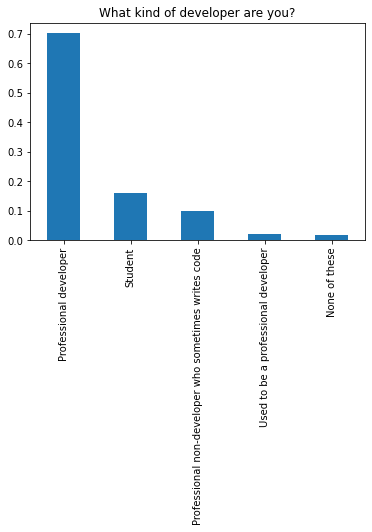

In [6]:
status_vals = df.Professional.value_counts()#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

### 9 Categorical Variables 

#### Question 1

**1.** Use the **df** dataframe. Identify the columns that are categorical in nature.

In [7]:
df.select_dtypes(include=['object']).shape

(51392, 147)

#### Question 2

**2.** Use **cat_df** and the cells below to fill in the dictionary below the correct value for each statement.

In [8]:
cat_df = df.select_dtypes(include=['object'])

In [9]:
cat_df_dict = {'the number of columns with no missing values': 6,
               'the number of columns with more than half of the column missing': 49,
               'the number of columns with more than 75% of the column missing': 13
              }

In [10]:
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] == 0)# Cell for your work here

6

In [11]:
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > .5)

50

In [12]:
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] > .75)

13

In [13]:
dummy_var_df = pd.DataFrame({'col1': ['a', 'a', 'b', 'b', 'a', np.nan, 'b', np.nan],
                             'col2': [1, np.nan, 3, np.nan, 5, 6, 7, 8] 
})
                            
dummy_var_df

col1  col2
0    a   1.0
1    a   NaN
2    b   3.0
3    b   NaN
4    a   5.0
5  NaN   6.0
6    b   7.0
7  NaN   8.0

#### Question 3

**3.** For each of the categorical variables, we now need to create dummy columns.  However, as we saw above, there are a lot of missing values in the current set of categorical columns.  So, you might be wondering, what happens when you dummy a column that has missing values.

The documentation for creating dummy variables in pandas is available [here](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html), but we can also just put this to practice to see what happens.

First, run the cell below to create a dataset that you will use before moving to the full stackoverflow data.

After you have created **dummy_var_df**, use the additional cells to fill in the **sol_3_dict** with the correct variables that match each key.

In [14]:
pd.get_dummies(dummy_var_df['col1'])# Use this cell to write whatever code you need.

a  b
0  1  0
1  1  0
2  0  1
3  0  1
4  1  0
5  0  0
6  0  1
7  0  0

Question 4¶
4. Notice, you can also use get_dummies to encode NaN values as their own dummy coded column using the dummy_na argument. Often these NaN values are also informative, but you are not capturing them by leaving them as 0 in every column of your model.

Create a new encoding for col1 of dummy_var_df that provides dummy columns not only for each level, but also for the missing values below. Store the 3 resulting dummy columns in dummy_cols_df and check your solution against ours.

In [15]:
dummy_cols_df = pd.get_dummies(dummy_var_df['col1'], dummy_na=True) #Create the three dummy columns for dummy_var_df


#### Question 5

**5.** We could use either of the above to begin creating an X matrix that would (potentially) allow us to predict better than just the numeric columns we have been using thus far.

First, complete the **create_dummy_df**.  Follow the instructions in the document string to assist as necessary.

In [16]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''

    return df

In [17]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [18]:
#Dropping where the salary has missing values
df  = df.dropna(subset=['Salary'], axis=0)

#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(12891, 21110)


In [22]:
#Pull a list of the column names of the categorical variables

In [23]:
#Use your newly created function...and the answer should be shape=5009,11938

In [ ]:
#Dropping where the salary has missing values
df  = df.dropna(subset=['Salary'], axis=0)

#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

#### Question 6

**6.** Use the document string below to complete the function.  Then test your function against the solution.  

In [ ]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
)

    #Drop columns with all NaN values

    #Dummy categorical variables


    # Mean function

    # Fill the mean


    #Split into explanatory and response variables

    #Split into train and test


    #Predict using your model


    #Score using your model


    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)

In [28]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 1.0.  The rsquared on the test data was -0.5260031576205402.


In [ ]:
### We are getting overfitting

### Putting It All Together

In [26]:
a = 'test_score'
b = 'train_score'
c = 'linear model (lm_model)'
d = 'X_train and y_train'
e = 'X_test'
f = 'y_test'
g = 'train and test data sets'
h = 'overfitting'

q1_piat = '''In order to understand how well our {} fit the dataset, 
            we first needed to split our data into {}.  
            Then we were able to fit our {} on the {}.  
            We could then predict using our {}  by providing 
            the linear model the {} for it to make predictions.  
            These predictions were for {}. 

            By looking at the {}, it looked like we were doing awesome because 
            it was 1!  However, looking at the {} suggested our model was not 
            extending well.  The purpose of this notebook will be to see how 
            well we can get our model to extend to new data.
            
            This problem where our data fits the training data well, but does
            not perform well on test data is commonly known as 
            {}.'''.format(c, g, c, d, c, e, f, b, a, h) #replace a with the correct variable
#c, g, c, d, c, e, f, b, a, h
print(q1_piat)

In order to understand how well our linear model (lm_model) fit the dataset, 
            we first needed to split our data into train and test data sets.  
            Then we were able to fit our linear model (lm_model) on the X_train and y_train.  
            We could then predict using our linear model (lm_model)  by providing 
            the linear model the X_test for it to make predictions.  
            These predictions were for y_test. 

            By looking at the train_score, it looked like we were doing awesome because 
            it was 1!  However, looking at the test_score suggested our model was not 
            extending well.  The purpose of this notebook will be to see how 
            well we can get our model to extend to new data.
            
            This problem where our data fits the training data well, but does
            not perform well on test data is commonly known as 
            overfitting.


#### Question 2

**2.** Now, we need to improve the model . Use the dictionary below to provide the true statements about improving **this model**.  **Also consider each statement as a stand alone**.  Though, it might be a good idea after other steps, which would you consider a useful **next step**?

In [32]:
(2 + 3) * 4

20

##### Question 3

**3.** Before we get too far along, follow the steps in the function below to create the X (explanatory matrix) and y (response vector) to be used in the model.  If your solution is correct, you should see a plot similar to the one shown in the Screencast.

In [29]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
   
    
    #Drop respondent and expected salary columns
   
    
    # Fill numeric columns with the mean
    
        
    # Dummy the categorical variables
    
        # for each cat add dummy var, drop original column
        
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [31]:

def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

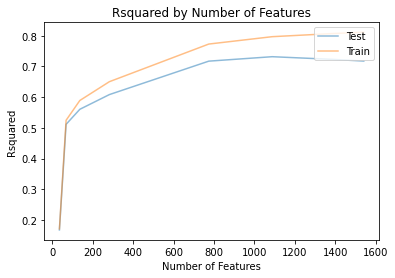

In [32]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [33]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2


1088
0.7316766986704022
0.7968545363044823


In [ ]:
#### Question 4

**4.** Use the output and above plot to correctly fill in the keys of the **q4_piat** dictionary with the correct variable.  Notice that only the optimal model results are given back in the above - they are stored in **lm_model**, **X_train**, **X_test**, **y_train**, and **y_test**.  If more than one answer holds, provide a tuple holding all the correct variables in the order of first variable alphabetically to last variable alphabetically.

In [ ]:
a = 'we would likely have a better rsquared for the test data.'
b = 1000
c = 872
d = 0.69
e = 0.82
f = 0.88
g = 0.72
h = 'we would likely have a better rsquared for the training data.'

q4_piat = {'The optimal number of features based on the results is': c, 
               'The model we should implement in practice has a train rsquared of': e, 
               'The model we should implement in practice has a test rsquared of': d,
               'If we were to allow the number of features to continue to increase': h
}

In [ ]:
#### Question 5

**5.** The default penalty on coefficients using linear regression in sklearn is a ridge (also known as an L2) penalty.  Because of this penalty, and that all the variables were normalized, we can look at the size of the coefficients in the model as an indication of the impact of each variable on the salary.  The larger the coefficient, the larger the expected impact on salary.  

Use the space below to take a look at the coefficients.  Then use the results to provide the **True** or **False** statements based on the data.

In [34]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

est_int         coefs     abs_coefs
42            Country_United States  56731.283619  56731.283619
28                   Country_Norway  40550.628110  40550.628110
8                 Country_Australia  40111.916279  40111.916279
383           Currency_Swiss francs  36748.955151  36748.955151
15                  Country_Denmark  30497.628811  30497.628811
123  YearsCodedJob_20 or more years  29980.868555  29980.868555
27              Country_New Zealand  29954.315738  29954.315738
23                   Country_Israel  29510.172957  29510.172957
13                   Country_Canada  29363.254074  29363.254074
22                  Country_Ireland  28551.627756  28551.627756
38              Country_Switzerland  27502.879903  27502.879903
378   Currency_Mexican pesos (MXN$) -27322.113610  27322.113610
114    YearsCodedJob_12 to 13 years  25279.750107  25279.750107
120    YearsCodedJob_18 to 19 years  25129.215217  25129.215217
121    YearsCodedJob_19 to 20 years  24938.668838  24938.668838
117    YearsCodedJob_15 to 16 years  23717.323445  23717.323445
119    YearsCodedJob_17 to 18 years  23538.676371  23538.676371
116    YearsCodedJob_14 to 15 years  21909.345308  21909.345308
118    YearsCodedJob_16 to 17 years  21157.006818  21157.006818
41           Country_United Kingdom  21080.097100  21080.097100

In [35]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

est_int         coefs     abs_coefs
42            Country_United States  56731.283619  56731.283619
28                   Country_Norway  40550.628110  40550.628110
8                 Country_Australia  40111.916279  40111.916279
383           Currency_Swiss francs  36748.955151  36748.955151
15                  Country_Denmark  30497.628811  30497.628811
123  YearsCodedJob_20 or more years  29980.868555  29980.868555
27              Country_New Zealand  29954.315738  29954.315738
23                   Country_Israel  29510.172957  29510.172957
13                   Country_Canada  29363.254074  29363.254074
22                  Country_Ireland  28551.627756  28551.627756
38              Country_Switzerland  27502.879903  27502.879903
378   Currency_Mexican pesos (MXN$) -27322.113610  27322.113610
114    YearsCodedJob_12 to 13 years  25279.750107  25279.750107
120    YearsCodedJob_18 to 19 years  25129.215217  25129.215217
121    YearsCodedJob_19 to 20 years  24938.668838  24938.668838
117    YearsCodedJob_15 to 16 years  23717.323445  23717.323445
119    YearsCodedJob_17 to 18 years  23538.676371  23538.676371
116    YearsCodedJob_14 to 15 years  21909.345308  21909.345308
118    YearsCodedJob_16 to 17 years  21157.006818  21157.006818
41           Country_United Kingdom  21080.097100  21080.097100

In [36]:
a = True
b = False

#According to the data...
q5_piat = {'Country appears to be one of the top indicators for salary': a,
               'Gender appears to be one of the indicators for salary': b, 
               'How long an individual has been programming appears to be one of the top indicators for salary': a,
               'The longer an individual has been programming the more they are likely to earn': b}